In [280]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from datetime import datetime,date,timedelta
import seaborn as sns
import os, warnings
from scipy.signal import savgol_filter
%matplotlib inline
warnings.filterwarnings('ignore')
cutOffYear = '1850'

In [202]:
globtemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalTemperatures.csv')
globtemp['dt'] = pd.to_datetime(globtemp['dt'])
globtemp['Year'] = globtemp['dt'].apply(lambda x : x.strftime('%Y'))

In [203]:
globTemp = globtemp.groupby('Year').mean().reset_index(drop=False)
globTemp.head()

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1,1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
2,1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
3,1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
4,1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
globTemp = globTemp[['Year']+['LandAverageTemperature']+['LandAverageTemperatureUncertainty']]
globAvg = globTemp['LandAverageTemperature'].mean()
globTemp['LandAverageTemperature'] = globTemp['LandAverageTemperature'].apply(lambda x : x - globAvg)
globTemp['Upper'] = globTemp['LandAverageTemperature'] + globTemp['LandAverageTemperatureUncertainty']
globTemp['Lower'] = globTemp['LandAverageTemperature'] - globTemp['LandAverageTemperatureUncertainty']
globTemp.head()

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,Upper,Lower
0,1750,0.350027,2.637818,2.987845,-2.287792
1,1751,-0.393194,2.781143,2.387949,-3.174337
2,1752,-2.589504,2.977000,0.387496,-5.566504
3,1753,0.018746,3.176000,3.194746,-3.157254
4,1754,0.099996,3.494250,3.594246,-3.394254


In [246]:
# globTemp['Year'] = globTemp['Year'].apply(lambda x : int(x))
globTempTrim = globTemp[globTemp['Year'] >= cutOffYear]

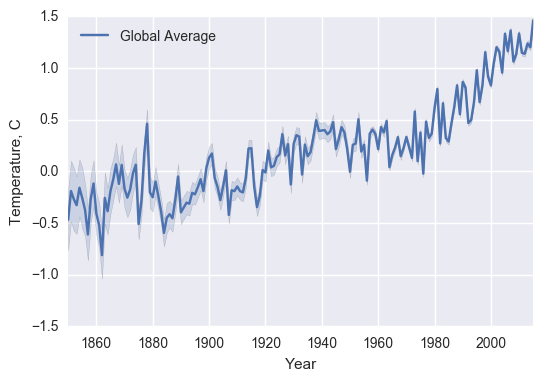

In [247]:
data = [globTempTrim['LandAverageTemperature'].values,globTempTrim['Upper'].values,globTempTrim['Lower'].values]
ax = sns.tsplot(time=globTempTrim['Year'], value="Temperature, C", 
                condition="Global Average",data=data) 

In [291]:
countryTemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')
countryTemp = countryTemp.dropna()
countryTemp['dt'] = pd.to_datetime(countryTemp['dt'])
countryTemp['Year'] = countryTemp['dt'].apply(lambda x : x.strftime('%Y'))
yearTemp = countryTemp.groupby(['Country','Year']).mean().reset_index(drop=False)
yearTemp.head()

,Country,Year,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,1838,18.379571,2.756000
1,Afghanistan,1840,13.413455,2.502000
2,Afghanistan,1841,13.997600,2.452100
3,Afghanistan,1842,15.154667,2.381222
4,Afghanistan,1843,13.756250,2.353083


In [249]:
globTemp['Country'] = 'Global'
globT = globTemp[['Country']+['Year']+['LandAverageTemperature']]
globT.columns = ['Country','Year','AvgTemp']
globT['Count'] = 0
globU = globTemp[['Country']+['Year']+['Upper']]
globU.columns = ['Country','Year','AvgTemp']
globU['Count'] = 1
globL = globTemp[['Country']+['Year']+['Lower']]
globL.columns = ['Country','Year','AvgTemp']
globL['Count'] = 2
allGlob = globT.append(globU)
allGlob = allGlob.append(globL).sort_values('Year').reset_index(drop=True)
# allGlob.head()

In [300]:
zoo = ['Canada','Greenland','Denmark']
data = allGlob
for each in zoo:
    holderTemp = yearTemp[yearTemp['Country'] == each]
    holderTemp = holderTemp[holderTemp['Year'] >= cutOffYear]
    holderAvg = holderTemp['AverageTemperature'].mean()
    holderTemp['AverageTemperature'] = holderTemp['AverageTemperature'].apply(lambda x : x - holderAvg)
    
    holderTemp['AverageTemperature'] = savgol_filter(holderTemp['AverageTemperature'], 7, 1)

    holderTemp['Upper'] = holderTemp['AverageTemperature'] + holderTemp['AverageTemperatureUncertainty']
    holderTemp['Lower'] = holderTemp['AverageTemperature'] - holderTemp['AverageTemperatureUncertainty']
        
    holderT = holderTemp[['Country']+['Year']+['AverageTemperature']]
    holderT.columns = ['Country','Year','AvgTemp']
    holderT['Count'] = 0
    holderU = holderTemp[['Country']+['Year']+['Upper']]
    holderU.columns = ['Country','Year','AvgTemp']
    holderU['Count'] = 1
    holderL = holderTemp[['Country']+['Year']+['Lower']]
    holderL.columns = ['Country','Year','AvgTemp']
    holderL['Count'] = 2

    name = each.replace(" ","")
    name = 'all'+name
    
    name = holderT.append(holderU)
    name = name.append(holderL).sort_values('Year').reset_index(drop=True)
    
    data = data.append(name)
    
data.head()

,Country,Year,AvgTemp,Count
0,Global,1750,0.350027,0
1,Global,1750,2.987845,1
2,Global,1750,-2.287792,2
3,Global,1751,-0.393194,0
4,Global,1751,2.387949,1


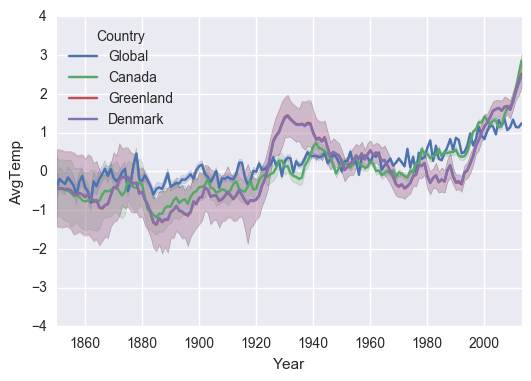

In [301]:
sns.tsplot(time='Year', 
                value='AvgTemp', 
                unit='Count',
                condition='Country',
                data=data)

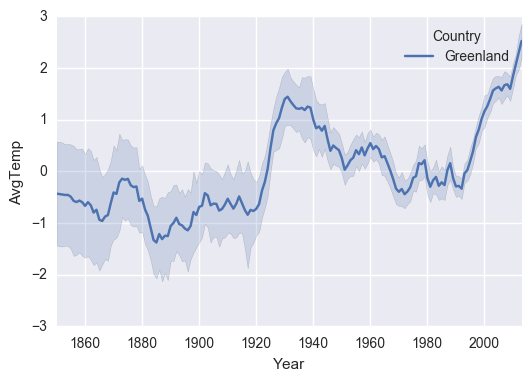

In [285]:
sns.tsplot(time='Year', 
                value='AvgTemp', 
                unit='Count',
                condition='Country',
                data= data[data['Country'] == 'Greenland'])

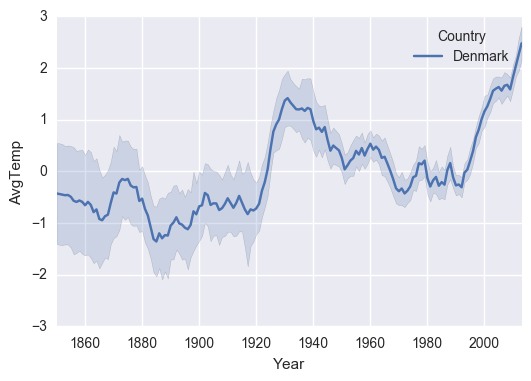

In [286]:
sns.tsplot(time='Year', 
                value='AvgTemp', 
                unit='Count',
                condition='Country',
                data= data[data['Country'] == 'Denmark'])

In [232]:
russiaTemp = yearTemp[yearTemp['Country'] == 'Russia']
russiaTemp = russiaTemp[russiaTemp['Year'] >= cutOffYear]
russiaAvg = russiaTemp['AverageTemperature'].mean()
russiaTemp['AverageTemperature'] = russiaTemp['AverageTemperature'].apply(lambda x : x - russiaAvg)
russiaTemp['Upper'] = russiaTemp['AverageTemperature'] + russiaTemp['AverageTemperatureUncertainty']
russiaTemp['Lower'] = russiaTemp['AverageTemperature'] - russiaTemp['AverageTemperatureUncertainty']
russiaTemp['Uncertainty'] = russiaTemp['AverageTemperatureUncertainty']/russiaTemp['AverageTemperature']
russiaTemp.head()

,Country,Year,AverageTemperature,AverageTemperatureUncertainty,Upper,Lower,Uncertainty
34002,Russia,1850,-1.037310,1.893667,0.856357,-2.930976,-1.825556
34003,Russia,1851,-0.280393,1.748167,1.467774,-2.028560,-6.234701
34004,Russia,1852,-0.650476,1.806750,1.156274,-2.457226,-2.777580
34005,Russia,1853,-0.886810,1.794917,0.908107,-2.681726,-2.024016
34006,Russia,1854,-0.101060,1.875167,1.774107,-1.976226,-18.555038


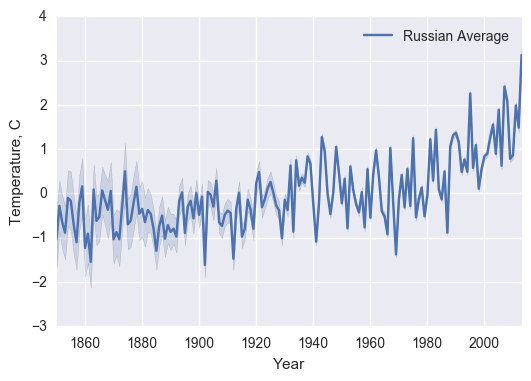

In [233]:
russiaData = [russiaTemp['AverageTemperature'],russiaTemp['Upper'],russiaTemp['Lower']]
ax = sns.tsplot(time=russiaTemp['Year'], value="Temperature, C", 
                condition="Russian Average",data=russiaData) 

In [227]:
import random
rando1 = random.sample(range(100), 10)
rando2 = random.sample(range(100), 10)
diff = [x - y for x,y in zip(rando1,rando2)]
d1 = np.mean(diff)
m1 = np.mean(rando1)
m2 = np.mean(rando2)
print(d1)
print(m1-m2)


-19.0
-19.0


In [234]:
gammas = sns.load_dataset("gammas")
gammas.head(100)
# ax = sns.tsplot(time="timepoint", value="BOLD signal",unit="subject", condition="ROI",data=gammas)

,timepoint,ROI,subject,BOLD signal
0,0.00000,IPS,0,0.513433
1,0.00000,IPS,1,-0.414368
2,0.00000,IPS,2,0.214695
3,0.00000,IPS,3,0.814809
4,0.00000,IPS,4,-0.894992
5,0.00000,IPS,5,-0.073709
6,0.00000,IPS,6,3.542734
7,0.00000,IPS,7,0.080169
8,0.00000,IPS,8,1.547083
9,0.00000,IPS,9,2.827153


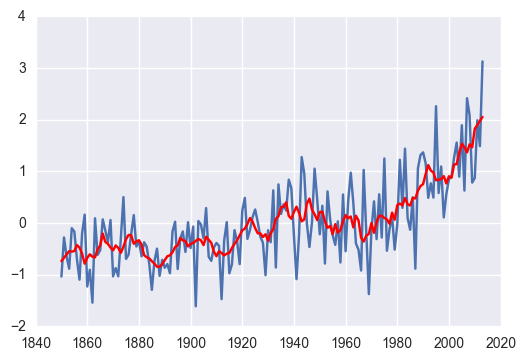

In [277]:
import matplotlib.pyplot as plt
boo = savgol_filter(russiaTemp['AverageTemperature'], 7, 1)
plt.plot(russiaTemp['Year'],russiaTemp['AverageTemperature'])
plt.plot(russiaTemp['Year'], boo, color='red')
plt.show()

In [278]:
len(boo)

164

In [279]:
len(russiaTemp['AverageTemperature'])

164

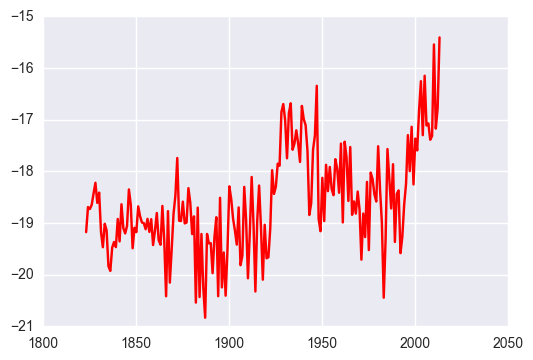

In [292]:
test = yearTemp[yearTemp['Country'] == 'Greenland']
plt.plot(test['Year'],test['AverageTemperature'] , color='red')
plt.show()

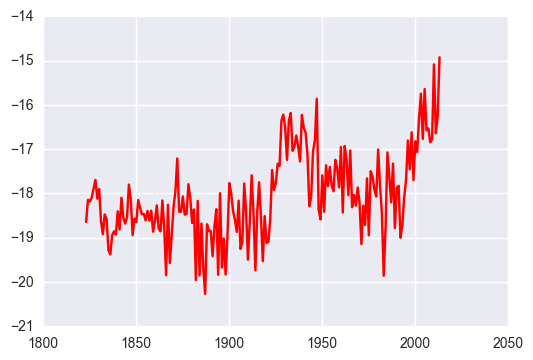

In [293]:
test2 = yearTemp[yearTemp['Country'] == 'Denmark']
plt.plot(test2['Year'],test2['AverageTemperature'] , color='red')
plt.show()

In [309]:
testing = list(test['AverageTemperature'].values-test2['AverageTemperature'].values)
print(np.mean(testing))

-0.534316753927
